In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
!git clone https://github.com/NTT123/viwik18.git

Cloning into 'viwik18'...
remote: Enumerating objects: 161, done.
remote: Total 161 (delta 0), reused 0 (delta 0), pack-reused 161 (from 1)
Receiving objects: 100% (161/161), 453.04 MiB | 19.64 MiB/s, done.
Resolving deltas: 100% (29/29), done.
Updating files: 100% (13/13), done.


In [4]:
! pip install gensim matplotlib seaborn scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 37.6 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.3 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
tsfresh 0.20.3 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.


In [5]:
import re
import gensim
import matplotlib.pyplot as plt
import seaborn
import scipy

# Load dataset

In [6]:
# Write all to a file
!cat /kaggle/working/viwik18/dataset/viwik18_* > /kaggle/working/viwik18/viwik18.txt

In [7]:
import os
path = '/kaggle/working/viwik18/viwik18.txt'

In [34]:
with open(path, 'r', encoding='utf8') as f:
    text_data = f.read()

In [35]:
text_data[1000:3000]

'etf and the internet society về internet engineering task force và isoc bài của vint cerf một tám sáu một chín chín năm   l association internationale de lutte contre la cybercriminalité bản lưu  public interest registry  tiếng việt  tiếng việt còn gọi tiếng việt nam hay việt ngữ là ngôn ngữ của người việt và là ngôn ngữ chính thức tại việt nam đây là tiếng mẹ đẻ của khoảng tám năm phần trăm dân cư việt nam cùng với hơn bốn triệu người việt hải ngoại tiếng việt còn là ngôn ngữ thứ hai của các dân tộc thiểu số tại việt nam mặc dù tiếng việt có một số từ vựng vay mượn từ tiếng hán và trước đây dùng chữ nôm một hệ chữ dựa trên chữ hán để viết nhưng tiếng việt được coi là một trong số các ngôn ngữ thuộc ngữ hệ nam á có số người nói nhiều nhất ngày nay tiếng việt dùng bảng chữ cái latinh gọi là chữ quốc ngữ cùng các dấu thanh để viết   tiếng việt được chính thức ghi nhận trong hiến pháp nước cộng hòa xã hội chủ nghĩa việt nam hai không một ba tại chương i điều năm mục ba là ngôn ngữ quốc g

In [36]:
chunked_data = re.split(r'\s{2,}',text_data)
chunked_data[:3]

['trang chính',
 'internet society',
 'internet society hay isoc là một tổ chức quốc tế hoạt động phi lợi nhuận phi chính phủ và bao gồm các thành viên có trình độ chuyên ngành tổ chức này chú trọng đến tiêu chuẩn giáo dục và các vấn đề về chính sách với trên một bốn năm tổ chức thành viên và sáu năm không không không thành viên cá nhân isoc bao gồm những con người cụ thể trong cộng đồng internet mọi chi tiết có thể tìm thấy tại website của isoc']

In [37]:
len(chunked_data)

6652068

In [38]:
chunked_data[:10]

['trang chính',
 'internet society',
 'internet society hay isoc là một tổ chức quốc tế hoạt động phi lợi nhuận phi chính phủ và bao gồm các thành viên có trình độ chuyên ngành tổ chức này chú trọng đến tiêu chuẩn giáo dục và các vấn đề về chính sách với trên một bốn năm tổ chức thành viên và sáu năm không không không thành viên cá nhân isoc bao gồm những con người cụ thể trong cộng đồng internet mọi chi tiết có thể tìm thấy tại website của isoc',
 'internet society nằm ở gần thủ đô washington dc hoa kỳ và geneva thụy sĩ số hội viên của nó bao gồm hơn một bốn năm tổ chức thành viên và hơn sáu năm không không không cá nhân thành viên còn có thể tự lập một chi nhánh của tổ chức tùy theo vị trí hoặc sở thích hiện nay tổ chức có tới chín không chi nhánh trên toàn thế giới',
 'nhiệm vụ và mục đích hoạt động',
 'bảo đảm cổ vũ cho sự phát triển mở rộng và sử dụng internet được thuận lợi nhất cho mọi người trên toàn thế giới',
 'xem thêm',
 'lịch sử internet',
 'liên kết ngoài',
 'isoc việt na

In [39]:
chunked_data = '\n'.join(chunked_data)

In [40]:
with open ('/kaggle/working/chunked_data.txt', 'w', encoding='utf8') as f:
    f.write(chunked_data)

# Preprocess data

In [21]:
!git clone https://github.com/stopwords/vietnamese-stopwords.git

fatal: destination path 'vietnamese-stopwords' already exists and is not an empty directory.


In [22]:
!pip install pyvi

In [23]:
stw_path = '/kaggle/working/vietnamese-stopwords/vietnamese-stopwords-dash.txt'
with open(stw_path, 'r', encoding='utf8') as f:
    stw_list = f.read()
    stw_list = stw_list.split('\n')

stw_list[:5]

['a_lô', 'a_ha', 'ai', 'ai_ai', 'ai_nấy']

In [27]:
from gensim.models.word2vec import LineSentence
from pyvi import ViTokenizer
from collections import Counter
from tqdm import tqdm

def process_and_write_lines(input_file_path, output_file_path):
    sentences = LineSentence(input_file_path)
    word_freq = Counter()
    with open(output_file_path, 'w', encoding='utf8') as outfile:
        for line in tqdm(sentences):
            
            original_line = ' '.join(line)
            words = ViTokenizer.tokenize(original_line).split()
            words = [w for w in words if w not in stw_list]
            word_freq.update(words)
            outfile.write(' '.join(words) + '\n')
    with open(output_file_path, 'r', encoding='utf8') as infile, \
         open('/kaggle/working/final_processed_text.txt', 'w', encoding='utf8') as final_outfile:
        for line in tqdm(infile):
            words = line.strip().split()
            filtered_words = [word for word in words if word_freq[word] >= 2]
            if filtered_words:
                final_outfile.write(' '.join(filtered_words) + '\n')
    return '/kaggle/working/final_processed_text.txt'

# Example usage:
input_file_path = '/kaggle/working/chunked_data.txt'
output_file_path = '/kaggle/working/processed_text.txt'

final_processed_file = process_and_write_lines(input_file_path, output_file_path)

sentences = LineSentence(final_processed_file)

6652067it [1:57:25, 944.11it/s] 
6652067it [01:04, 103193.43it/s]


In [28]:
sentences

# Embeddings

In [29]:
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# https://towardsdatascience.com/visualizing-your-embeddings-4c79332581a9#:~:text=To%20help,%20there%20are%20several%20prominent%20ways%20to%20visualize%20the

In [30]:
skipgram_model = Word2Vec(vector_size=100, window=5, min_count=1, sg=1, workers=4)
skipgram_model.build_vocab(sentences)
skipgram_model.train(sentences, total_examples=skipgram_model.corpus_count, epochs=skipgram_model.epochs)

(324005241, 358632355)

In [31]:
cbow_model = Word2Vec(vector_size=100, window=5, min_count=1, sg=0, workers=4)
cbow_model.build_vocab(sentences)
cbow_model.train(sentences, total_examples=skipgram_model.corpus_count, epochs=skipgram_model.epochs)

(324002149, 358632355)

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim.models import Word2Vec

def visualize_embeddings(model, keyword, title):
    # Ensure the keyword exists in the model's vocabulary
    if keyword not in model.wv:
        print(f"'{keyword}' not in vocabulary.")
        return

    # Get the words and their corresponding vectors
    words = list(model.wv.index_to_key)
    vectors = model.wv[words]

    # Get the top 10 most similar words to the keyword
    similar_words = model.wv.most_similar(keyword, topn=100)
    similar_words = [word for word, _ in similar_words]  # Extract words from tuples

    # Append the keyword to the list to include it in the visualization
    words_to_visualize = similar_words + [keyword]
    
    # Ensure there are enough words for t-SNE
    if len(words_to_visualize) < 2:
        print("Not enough words to visualize.")
        return

    indices = [words.index(word) for word in words_to_visualize]
    selected_vectors = vectors[indices]

    # Reduce dimensions using t-SNE
    perplexity = min(5, len(selected_vectors) - 1)  # Set perplexity to be less than the number of samples
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=0)
    reduced_vectors = tsne.fit_transform(selected_vectors)

    # Create a scatter plot
    plt.figure(figsize=(12, 8))
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1])

    # Annotate the points with the words
    for i, word in enumerate(words_to_visualize):
        plt.annotate(word, xy=(reduced_vectors[i, 0], reduced_vectors[i, 1]))

    plt.title(f"{title} - Word Embeddings Visualization for '{keyword}'")
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.grid()
    plt.show()

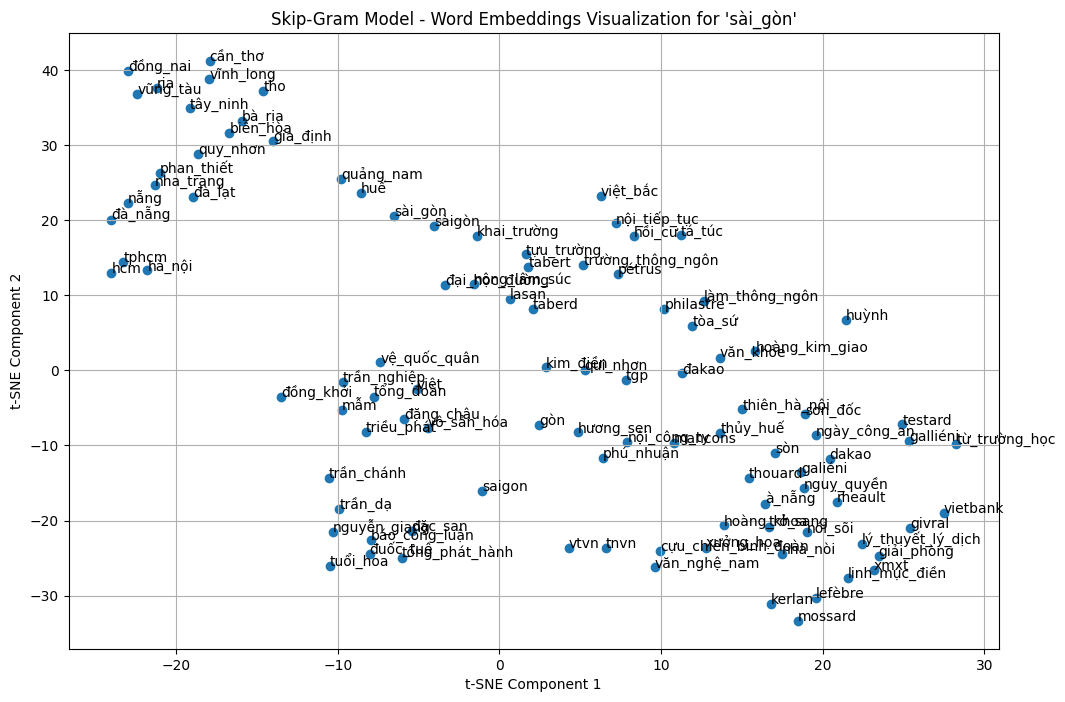

In [50]:
visualize_embeddings(skipgram_model, 'sài_gòn', 'Skip-Gram Model')

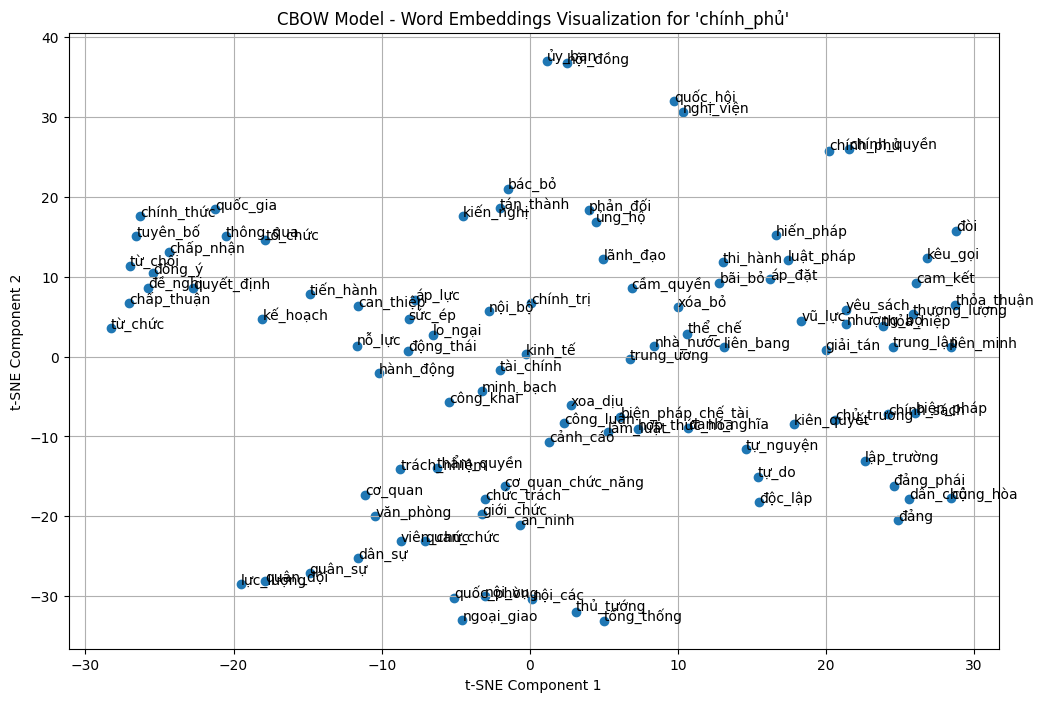

In [51]:
visualize_embeddings(cbow_model, 'chính_phủ', 'CBOW Model')

In [44]:
skipgram_model.wv.most_similar("chính_phủ", topn=10)

[('chính_quyền', 0.8519269824028015),
 ('cam_kết_hợp_tác', 0.8457626700401306),
 ('thẩm_quyền_hành_pháp', 0.8427659273147583),
 ('tái_triệu_tập', 0.8383426070213318),
 ('cảnh_báo_công_dân', 0.8368692398071289),
 ('chính_phủ_nhận', 0.8364808559417725),
 ('chính_quốc_hội', 0.8361845016479492),
 ('chánh_phủ', 0.8273490071296692),
 ('vong_lục', 0.8236298561096191),
 ('hội_đồng_hành_pháp', 0.8235837817192078)]

In [33]:
cbow_model.wv.most_similar("sài_gòn", topn=10)

[('hà_nội', 0.8147391080856323),
 ('huế', 0.7730392217636108),
 ('đà_nẵng', 0.7403532266616821),
 ('việt_nam', 0.6409063339233398),
 ('chợ', 0.5892495512962341),
 ('đà_lạt', 0.58922278881073),
 ('huỳnh', 0.5860971212387085),
 ('quảng_nam', 0.5827226638793945),
 ('minh', 0.5763943195343018),
 ('nguyễn', 0.5726865530014038)]